# Business Case Assessment
For The Resource Group Case Assessment

Abigail Stokes, November 1, 2023


In [354]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import shutup;shutup.please()

#Reading in the Data
prod_info = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Product Information')
item_cost = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Item Costs')
discount = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Supplier Discounts')
market_research = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Market Research')

In [355]:
#Visual Inspection of data 
print("Product Information")
prod_info

Product Information


,Manufacturer,Product Number
0,"Inc, Supplier A",MAG34343
1,Supplier A Inc.,MAG34367
2,Supplier A INC,MAG34389
3,Supplier B Corporation,ESE345
4,Supplier B Corp.,ESE346
5,Supplier B CORP,ESE347
6,Supplier C Co,N211121
7,Supplier C Co.,N211450
8,Supplier C Company,N211789
9,Supplier D,CAPSUR034


### Question 1: Standardize the supplier names from the Manufacturer column of the Product Information table. Store the cleaned names in a column called Manufacturer Clean.

In [356]:
# Adding a new column to Product Information with clean Manufacturer names
prod_info['Manufacturer Clean'] = prod_info.Manufacturer.str.extract(r'(supplier\s[A-E])', flags=re.IGNORECASE)
prod_info

,Manufacturer,Product Number,Manufacturer Clean
0,"Inc, Supplier A",MAG34343,Supplier A
1,Supplier A Inc.,MAG34367,Supplier A
2,Supplier A INC,MAG34389,Supplier A
3,Supplier B Corporation,ESE345,Supplier B
4,Supplier B Corp.,ESE346,Supplier B
5,Supplier B CORP,ESE347,Supplier B
6,Supplier C Co,N211121,Supplier C
7,Supplier C Co.,N211450,Supplier C
8,Supplier C Company,N211789,Supplier C
9,Supplier D,CAPSUR034,Supplier D


In [357]:
# Looking at Item Cost table
print("Item Cost")
item_cost

Item Cost


,Product Number,Item Description,Item Cost
0,ESE346,ELECTRODES PACING ESSENTIO,20
1,MAG34367,PACER CARDIAC MAGNF PULSE GENTR,800
2,N211121,LEADS PACING NOVS,15
3,MER6793,ELECTRODES PACING MERRIl,25
4,ESE345,LEADS PACING ESSENTIO,30
5,CAPSUR110,PACER CARDIAC AZURE PULSE GENTR,960
6,MER1232,LEADS PACING MERRIL,125
7,ESE347,PACER CARDIAC ESSENTIO PULS GENTR,900
8,CAPSUR045,ELECTRODES PACING CAPSUR,10
9,N211450,ELECTRODES PACING NOVS,10


In [358]:
# Joining the Product Info and Item Cost table on Product Number
merged_df = prod_info.merge(item_cost, how = 'left', on = ['Product Number'])

# Dropping original manufacturer column
merged_df = merged_df[['Product Number', 'Manufacturer Clean', 'Item Description','Item Cost']]
merged_df

,Product Number,Manufacturer Clean,Item Description,Item Cost
0,MAG34343,Supplier A,LEADS PACING MAGNF,75
1,MAG34367,Supplier A,PACER CARDIAC MAGNF PULSE GENTR,800
2,MAG34389,Supplier A,ELECTRODES PACING MAGNF,25
3,ESE345,Supplier B,LEADS PACING ESSENTIO,30
4,ESE346,Supplier B,ELECTRODES PACING ESSENTIO,20
5,ESE347,Supplier B,PACER CARDIAC ESSENTIO PULS GENTR,900
6,N211121,Supplier C,LEADS PACING NOVS,15
7,N211450,Supplier C,ELECTRODES PACING NOVS,10
8,N211789,Supplier C,PACER CARDIAC NOVS PULSE GENTR,950
9,CAPSUR034,Supplier D,LEADS PACING CAPSUR,10


Observations: 
1. We see that each Supplier provides three different types of items: leads pacing, a pulse generator, and electrodes pacing.
2. The first three (or more) characters of the product number is consistent within each supplier.

Next, let's clean up the data a bit.


In [359]:
# Adding new column with extracted Item Type 
pattern = r"(LEADS\sPACING|PACER\sCARDIAC|ELECTRODES\sPACING)" #pattern to find item name
merged_df['Item Type'] = merged_df['Item Description'].str.extract(pattern, flags=re.IGNORECASE)

# Drop original Manufacturer Name
merged_df = merged_df.rename(columns={'Manufacturer Clean' : 'Manufacturer'})

# Drop original Item description
merged_df = merged_df.drop(columns={'Item Description'})

merged_df

,Product Number,Manufacturer,Item Cost,Item Type
0,MAG34343,Supplier A,75,LEADS PACING
1,MAG34367,Supplier A,800,PACER CARDIAC
2,MAG34389,Supplier A,25,ELECTRODES PACING
3,ESE345,Supplier B,30,LEADS PACING
4,ESE346,Supplier B,20,ELECTRODES PACING
5,ESE347,Supplier B,900,PACER CARDIAC
6,N211121,Supplier C,15,LEADS PACING
7,N211450,Supplier C,10,ELECTRODES PACING
8,N211789,Supplier C,950,PACER CARDIAC
9,CAPSUR034,Supplier D,10,LEADS PACING


### Question #4: Based on the item descriptions and costs, create a new table with the median price per type of item. (Hint: There are 3 types of items.)


In [360]:
#Median Cost per part
median_cost = merged_df.groupby('Item Type')['Item Cost'].median()
median_cost

Item Type
ELECTRODES PACING     20.0
LEADS PACING          30.0
PACER CARDIAC        900.0
Name: Item Cost, dtype: float64

### Question 2: Use the dataset to calculate the cost of a pacemaker system for each supplier (excluding any discounts).

  Manufacturer  Item Cost
0   Supplier A        900
1   Supplier B        950
2   Supplier C        975
3   Supplier D        980
4   Supplier E        850


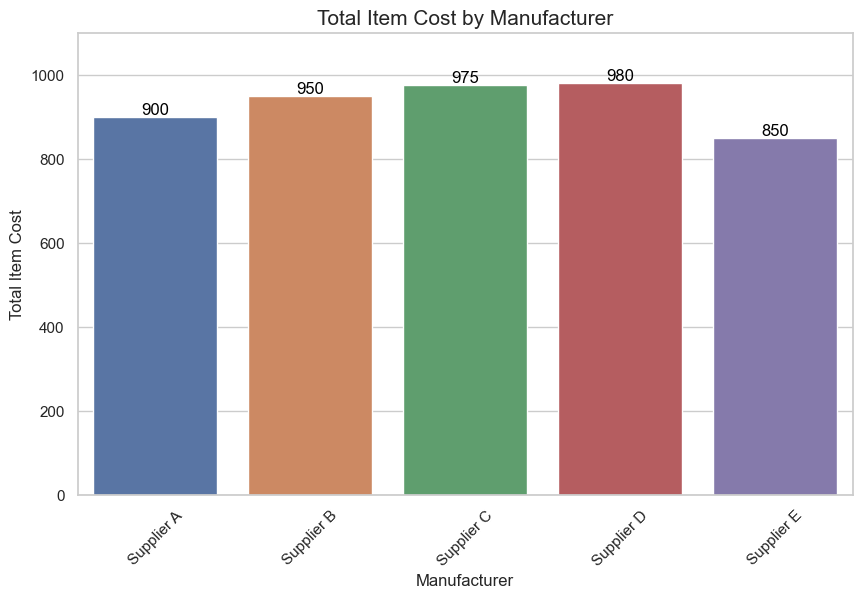

In [361]:
def plot_by_manufacturer(x_axis, y_axis, df):
     # Sum item costs by manufacturer
    grouped = df.groupby(x_axis)[y_axis].sum().reset_index()

    # Plot the data
    sns.set(style="whitegrid")

    # Create a bar plot
    plt.figure(figsize=(10, 6))  
    ax = sns.barplot(x=x_axis, y=y_axis, data=grouped)
    plt.xlabel('Manufacturer')
    plt.ylabel('Total Item Cost')
    plt.title('Total Item Cost by Manufacturer', fontsize=15)
    plt.ylim(0,1100) #increase y-axis for visibility
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Add bar labels to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


    print(grouped)
    plt.show()

plot_by_manufacturer('Manufacturer','Item Cost',merged_df)

It looks like Supplier E is the cheapest based on overall cost, and suppliers C and D are the most expensive. Now let's take a look at how cost breaks down by part

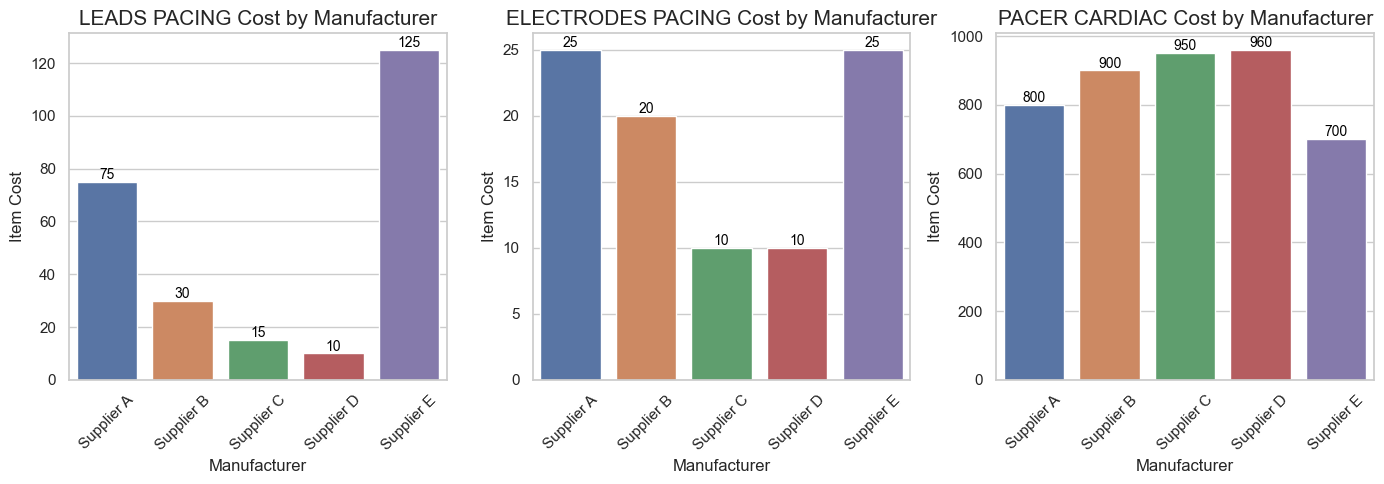

In [362]:
#Define a function for plotting by item part
def plot_by_part(x_axis,y_axis, df):  
    # Plot item cost by supplier, broken down by item type
    fig, axes = plt.subplots(1, 3, figsize=(14, 5))

    # Create a list of item types
    item_types = ['LEADS PACING', 'ELECTRODES PACING', 'PACER CARDIAC']

    for i, item_type in enumerate(item_types):
        ax = sns.barplot(x=x_axis, y=y_axis, data=df[df['Item Type'] == item_type], ax=axes[i])
        axes[i].set_title(f'{item_type} Cost by Manufacturer', fontsize=15)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for each subplot
        
        # Add labels to the bars
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

#Call the function
plot_by_part('Manufacturer','Item Cost', merged_df)


Interesting observation here: we see that while Supplier E was the cheapest overall, their leads pacing product is much more expensive than the other suppliers.

In [363]:
#Look at discounts table
print("Supplier Discounts")

discount

Supplier Discounts


,Manufacturer,Discount
0,Supplier A,0.10
1,Supplier E,0.10
2,Supplier D,0.15
3,Supplier B,0.20
4,Supplier C,0.20


In [364]:
# Add new column to Item table with Manufacturer Discount
merged_df = merged_df.merge(discount, how = 'left', on = ['Manufacturer'])

# Add new column for cost after discount
merged_df['Discount Cost'] = merged_df['Item Cost']*(1-merged_df['Discount'])

# Add new column for total savings from discount
merged_df['Savings'] = merged_df['Item Cost']-merged_df['Discount Cost']
merged_df

,Product Number,Manufacturer,Item Cost,Item Type,Discount,Discount Cost,Savings
0,MAG34343,Supplier A,75,LEADS PACING,0.10,67.5,7.5
1,MAG34367,Supplier A,800,PACER CARDIAC,0.10,720.0,80.0
2,MAG34389,Supplier A,25,ELECTRODES PACING,0.10,22.5,2.5
3,ESE345,Supplier B,30,LEADS PACING,0.20,24.0,6.0
4,ESE346,Supplier B,20,ELECTRODES PACING,0.20,16.0,4.0
5,ESE347,Supplier B,900,PACER CARDIAC,0.20,720.0,180.0
6,N211121,Supplier C,15,LEADS PACING,0.20,12.0,3.0
7,N211450,Supplier C,10,ELECTRODES PACING,0.20,8.0,2.0
8,N211789,Supplier C,950,PACER CARDIAC,0.20,760.0,190.0
9,CAPSUR034,Supplier D,10,LEADS PACING,0.15,8.5,1.5


  Manufacturer  Discount Cost
0   Supplier A          810.0
1   Supplier B          760.0
2   Supplier C          780.0
3   Supplier D          833.0
4   Supplier E          765.0


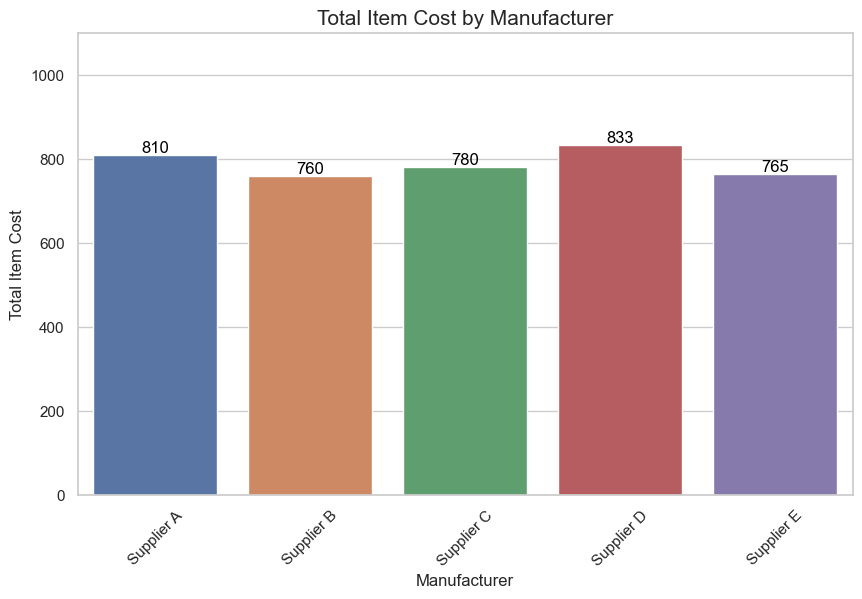

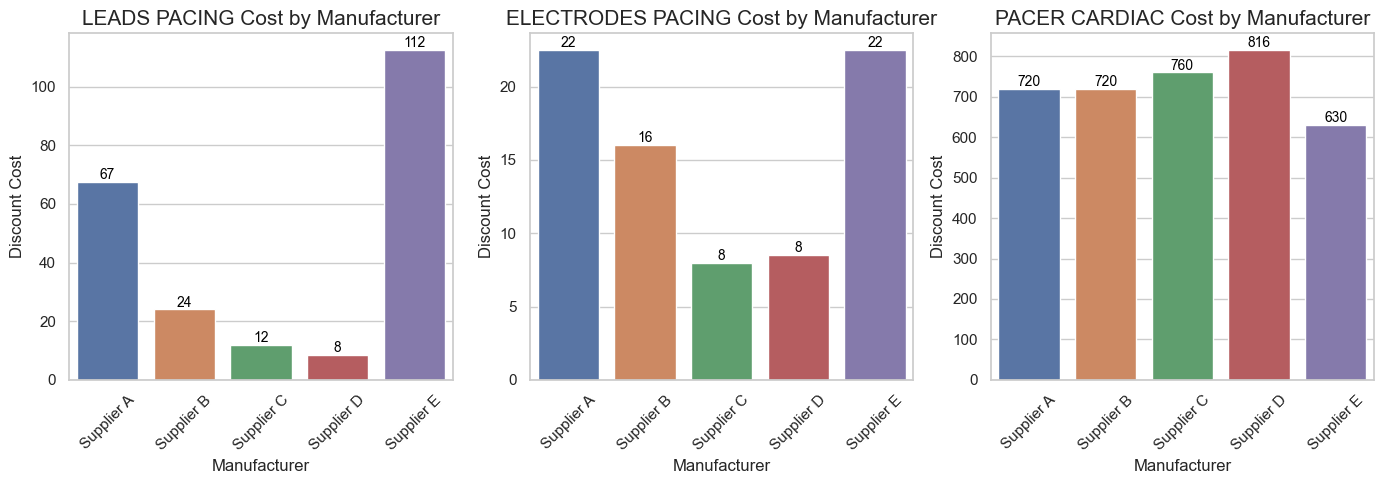

In [365]:
# Now look at discounted costs by supplier overall and by part
plot_by_manufacturer('Manufacturer','Discount Cost', merged_df)

plot_by_part('Manufacturer','Discount Cost', merged_df)

### Question 3: If there were 50 cases, what is total cost of a pacemaker system for each supplier before discounts and after discounts?

First, let's see the cost difference by manufacter for just one order.

  Manufacturer  Item Cost
0   Supplier A        900
1   Supplier B        950
2   Supplier C        975
3   Supplier D        980
4   Supplier E        850


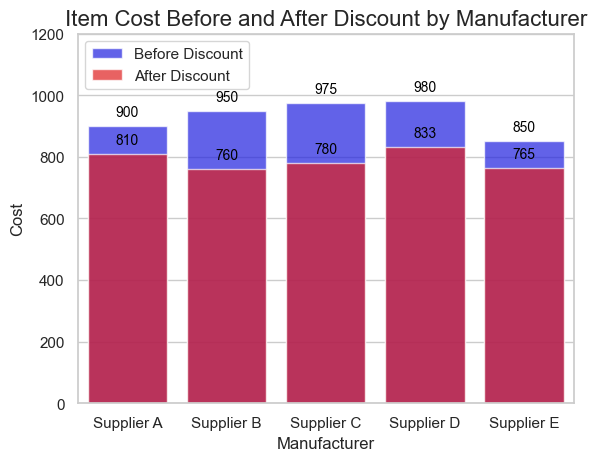

In [366]:
# Look at total system cost before and after discount

# Grouping data to sum by cost
grouped1 = merged_df.groupby('Manufacturer')['Item Cost'].sum().reset_index()
grouped2 = merged_df.groupby('Manufacturer')['Discount Cost'].sum().reset_index()

# Create a bar chart usign grouped data
sns.barplot(data = grouped1, x="Manufacturer", y="Item Cost", color="blue", label="Item Cost",alpha = 0.7)
sns.barplot(data = grouped2, x="Manufacturer", y="Discount Cost", color="red", label="Discounted Cost", alpha=0.7)

# Add integer data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):d}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Customize the chart
plt.xlabel("Manufacturer")
plt.ylabel("Cost")

# Increase the title font size
plt.title("Item Cost Before and After Discount by Manufacturer", fontsize=16)

# Set the y-axis limit to 0-1200
plt.ylim(0, 1200)

# Customize legend labels
legend_labels = plt.legend(loc="upper left")
legend_labels.get_texts()[0].set_text("Before Discount")
legend_labels.get_texts()[1].set_text("After Discount")

# Show the data and chart
print(grouped1)
plt.show()


Now, lets see how this difference changes after 50 such orders

In [367]:
#Calculating total cost and savings after 50 orders

# Make new table that stores total cost pre and post order by manufacturer

order_data = pd.DataFrame(data = {'Manufacturer': merged_df['Manufacturer'], 'Item Type': merged_df['Item Type'],'Discount':merged_df['Discount'], 'Pre-Discount':merged_df['Item Cost']*50})

order_data['Post-Discount'] = order_data['Pre-Discount']*(1-order_data['Discount'])

order_data['Total Savings'] = order_data['Pre-Discount'] - order_data['Post-Discount']

#Showing total savings by manufacturer
cost_table = order_data.groupby('Manufacturer').sum().reset_index()
cost_table = cost_table.drop(columns={'Item Type','Discount'})

cost_table

,Manufacturer,Pre-Discount,Post-Discount,Total Savings
0,Supplier A,45000,40500.0,4500.0
1,Supplier B,47500,38000.0,9500.0
2,Supplier C,48750,39000.0,9750.0
3,Supplier D,49000,41650.0,7350.0
4,Supplier E,42500,38250.0,4250.0


  Manufacturer  Item Cost
0   Supplier A        900
1   Supplier B        950
2   Supplier C        975
3   Supplier D        980
4   Supplier E        850


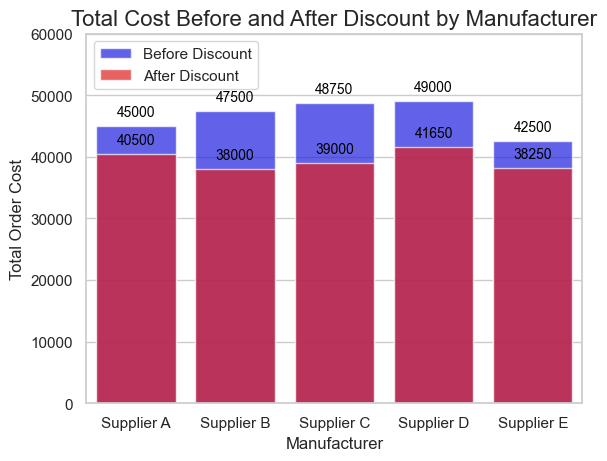

In [368]:
# Look at total order cost before and after discount

# Create a bar chart usign grouped data
sns.barplot(data = cost_table, x="Manufacturer", y="Pre-Discount", color="blue", label="Item Cost",alpha = 0.7)
sns.barplot(data = cost_table, x="Manufacturer", y="Post-Discount", color="red", label="Discounted Cost", alpha=0.7)

# Add integer data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):d}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Customize the chart
plt.xlabel("Manufacturer")
plt.ylabel("Total Order Cost")

# Increase the title font size
plt.title("Total Cost Before and After Discount by Manufacturer", fontsize=16)
plt.ylim(0,60000)

# Customize legend labels
legend_labels = plt.legend(loc="upper left")
legend_labels.get_texts()[0].set_text("Before Discount")
legend_labels.get_texts()[1].set_text("After Discount")


# Show the data and chart
print(grouped1)
plt.show()


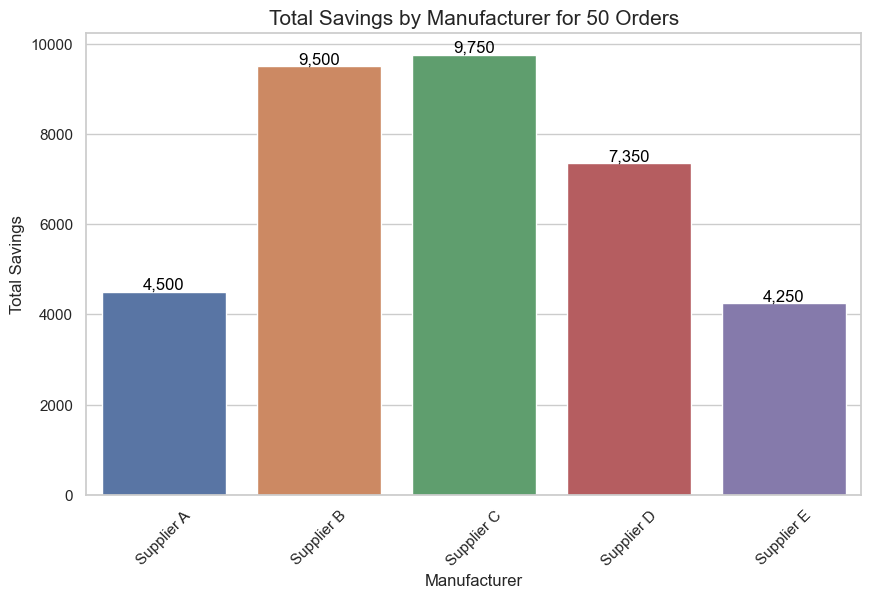

In [369]:
# Plotting total savings
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x='Manufacturer', y='Total Savings', data=cost_table)
plt.xlabel('Manufacturer')
plt.ylabel('Total Savings')
plt.title('Total Savings by Manufacturer for 50 Orders', fontsize=15)
#plt.ylim(0,1100) #increase y-axis for visibility
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Add bar labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [370]:
print("Market Research")

market_research

new_header = market_research.iloc[0] #grab the first row for the header
market_research = market_research[1:] #take the data less the header row
market_research.columns = new_header
market_research

Market Research


,Supplier,Shipping Times,Labor Shortages,Backorder Issues,Doctor's Opinion of Product,Supplier Sales Representative Relationship,Frequency of Quality Issues
1,Supplier A,Long \n(2+ weeks),Infrequently Impacted,Occassionally,Neutral,Dislike,Never
2,Supplier B,Average \n(1 week),Very Frequently Impacted,Often,Positive,Friendly,Hardly Ever
3,Supplier C,Short \n(2-3 days),Infrequently Impacted,Often,Neutral,Neutral,Occassionally
4,Supplier D,Short \n(2-3 days),Very Frequently Impacted,Occassionally,Positive,Neutral,Occassionally
5,Supplier E,Long \n(2+ weeks),Sometimes Impacted,Hardly Ever,Negative,Friendly,Hardly Ever


### Question #5: Supplier A has notified us that product MAG34367 has increased in price by $25. Adjust the data in the table.


In [371]:
#Update cost of item where product number = 'MAG34367'
merged_df.loc[merged_df['Product Number'] == 'MAG34367', 'Item Cost'] += 25
merged_df

,Product Number,Manufacturer,Item Cost,Item Type,Discount,Discount Cost,Savings
0,MAG34343,Supplier A,75,LEADS PACING,0.10,67.5,7.5
1,MAG34367,Supplier A,825,PACER CARDIAC,0.10,720.0,80.0
2,MAG34389,Supplier A,25,ELECTRODES PACING,0.10,22.5,2.5
3,ESE345,Supplier B,30,LEADS PACING,0.20,24.0,6.0
4,ESE346,Supplier B,20,ELECTRODES PACING,0.20,16.0,4.0
5,ESE347,Supplier B,900,PACER CARDIAC,0.20,720.0,180.0
6,N211121,Supplier C,15,LEADS PACING,0.20,12.0,3.0
7,N211450,Supplier C,10,ELECTRODES PACING,0.20,8.0,2.0
8,N211789,Supplier C,950,PACER CARDIAC,0.20,760.0,190.0
9,CAPSUR034,Supplier D,10,LEADS PACING,0.15,8.5,1.5


### Question #6: Create a visualization of your choice.
